In [1]:
import pandas as pd
df = pd.read_csv('../data/curated/full_listing.csv').iloc[:,1:]
remove = [ 'address', 'suburb', 'postcode', 'url', 'loc_address', 'lat', 'lon', 'list_date', 'list_history', 'list_count', 'SA2_NAME_2016', 'SA2', 'lgaregion', 'primary_school_name', 'secondary_school_name', 'pri_lat', 'pri_lon', 'sec_lat', 'sec_lon', 'closest_ed_name', 'ed_lat', 'ed_lon', 'train_stop', 'train_lat', 'train_lon']
df = df.drop(remove, axis=1)
df.head()

,bed,bath,car,type,weekly_rent,income_earner,income_median_age,income_median,income_mean,income_top_10_pct,...,primary_distance,primary_duration,secondary_distance,secondary_duration,ed_distance,ed_duration,train_distance,train_duration,melb_distance,melb_duration
0,3,1,2,AUF,525.0,14501.0,47.0,61520.0,101491.0,42.5,...,898,121,1272,167,6019,724,1514,189,14572,1508
1,4,2,3,AUF,850.0,14501.0,47.0,61520.0,101491.0,42.5,...,1110,131,2274,248,6690,794,1534,197,13778,1423
2,2,1,1,AUF,395.0,14501.0,47.0,61520.0,101491.0,42.5,...,604,104,2812,335,6947,818,464,87,13262,1372
3,3,2,2,House,580.0,14501.0,47.0,61520.0,101491.0,42.5,...,878,74,2866,281,5685,629,1619,190,14435,1464
4,2,1,1,House,400.0,14501.0,47.0,61520.0,101491.0,42.5,...,1089,163,2615,313,7650,924,806,114,12502,1288


In [2]:
df.type = pd.Categorical(df.type)
df['type_code'] = df.type.cat.codes

In [3]:
df = df.dropna()

In [4]:
df

,bed,bath,car,type,weekly_rent,income_earner,income_median_age,income_median,income_mean,income_top_10_pct,...,primary_duration,secondary_distance,secondary_duration,ed_distance,ed_duration,train_distance,train_duration,melb_distance,melb_duration,type_code
0,3,1,2,AUF,525.0,14501.0,47.0,61520.0,101491.0,42.5,...,121,1272,167,6019,724,1514,189,14572,1508,0
1,4,2,3,AUF,850.0,14501.0,47.0,61520.0,101491.0,42.5,...,131,2274,248,6690,794,1534,197,13778,1423,0
2,2,1,1,AUF,395.0,14501.0,47.0,61520.0,101491.0,42.5,...,104,2812,335,6947,818,464,87,13262,1372,0
3,3,2,2,House,580.0,14501.0,47.0,61520.0,101491.0,42.5,...,74,2866,281,5685,629,1619,190,14435,1464,1
4,2,1,1,House,400.0,14501.0,47.0,61520.0,101491.0,42.5,...,163,2615,313,7650,924,806,114,12502,1288,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41967,3,1,2,House,420.0,9344.0,42.0,52396.0,59194.0,26.3,...,277,12844,1157,2687,323,1866,265,38068,2541,1
41968,3,2,2,House,430.0,9344.0,42.0,52396.0,59194.0,26.3,...,102,13758,1188,118,11,679,117,41252,2658,1
41969,3,1,1,House,420.0,9344.0,42.0,52396.0,59194.0,26.3,...,82,13777,1210,997,153,687,142,41271,2680,1
41970,3,1,1,House,365.0,9344.0,42.0,52396.0,59194.0,26.3,...,208,13042,1159,2123,254,1302,196,40536,2629,1


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

/Users/nhe/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
x = df.drop(['type', 'weekly_rent'], axis=1)
y = df['weekly_rent']

In [7]:
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)

In [8]:
regressor.fit(x, y)

RandomForestRegressor(n_estimators=500, random_state=0)

In [9]:
x.columns

Index(['bed', 'bath', 'car', 'income_earner', 'income_median_age',
       'income_median', 'income_mean', 'income_top_10_pct', 'population_total',
       'population_children', 'population_prime_working', 'population_elderly',
       'population_early_working', 'population_mature_working',
       'secondary_school_rank', 'secondary_school_cohort',
       'proj_population_total', 'proj_population_children',
       'proj_population_early_working', 'proj_population_prime_working',
       'proj_population_mature_working', 'proj_population_elderly',
       'train_n_lines', 'primary_distance', 'primary_duration',
       'secondary_distance', 'secondary_duration', 'ed_distance',
       'ed_duration', 'train_distance', 'train_duration', 'melb_distance',
       'melb_duration', 'type_code'],
      dtype='object')

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics

<BarContainer object of 34 artists>

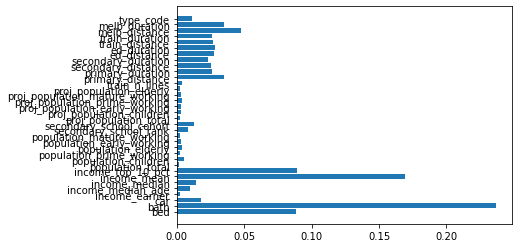

In [11]:
plt.barh(x.columns, regressor.feature_importances_)

In [12]:
x.columns

Index(['bed', 'bath', 'car', 'income_earner', 'income_median_age',
       'income_median', 'income_mean', 'income_top_10_pct', 'population_total',
       'population_children', 'population_prime_working', 'population_elderly',
       'population_early_working', 'population_mature_working',
       'secondary_school_rank', 'secondary_school_cohort',
       'proj_population_total', 'proj_population_children',
       'proj_population_early_working', 'proj_population_prime_working',
       'proj_population_mature_working', 'proj_population_elderly',
       'train_n_lines', 'primary_distance', 'primary_duration',
       'secondary_distance', 'secondary_duration', 'ed_distance',
       'ed_duration', 'train_distance', 'train_duration', 'melb_distance',
       'melb_duration', 'type_code'],
      dtype='object')

In [13]:
regressor.feature_importances_

array([0.08802211, 0.23647917, 0.01758104, 0.00267893, 0.0097666 ,
       0.01398437, 0.16902758, 0.0892878 , 0.001946  , 0.00513771,
       0.00266185, 0.00361099, 0.00291159, 0.00238424, 0.00859845,
       0.01259135, 0.00209153, 0.00334223, 0.00280701, 0.00384161,
       0.00329796, 0.00224011, 0.0038048 , 0.03465957, 0.02603137,
       0.02560527, 0.02317703, 0.02736732, 0.02848057, 0.02658413,
       0.02595145, 0.04789733, 0.03469804, 0.01145288])

In [14]:
pd.DataFrame([x.columns, regressor.feature_importances_]).to_csv('../plots/rf_importance.csv')

In [15]:
predictions = regressor.predict(x)

In [16]:
gt = y.tolist()

In [17]:
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(gt, predictions),4))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(gt, predictions),4))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(gt, predictions)),4))
mape = np.mean(np.abs((gt - predictions) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 4))
print('Accuracy:', round(100*(1 - mape), 4))
print('R-squared:', round(metrics.r2_score(gt, predictions),4))

Mean Absolute Error (MAE): 21.5018
Mean Squared Error (MSE): 1967.1789
Root Mean Squared Error (RMSE): 44.3529
Mean Absolute Percentage Error (MAPE): 4.3261
Accuracy: 95.6739
R-squared: 0.945


In [18]:
import _pickle as cPickle
with open('../models/rf_regressor', 'wb') as f:
    cPickle.dump(regressor, f)

In [32]:
compare_df = pd.DataFrame({'gt': y.tolist(), 'prediction': predictions.tolist()})

In [33]:
compare_df

,gt,prediction
0,525.0,545.770000
1,850.0,863.904000
2,395.0,406.040000
3,580.0,617.548200
4,400.0,409.206667
...,...,...
26040,420.0,414.986000
26041,430.0,435.393000
26042,420.0,411.996000
26043,365.0,379.780000


In [39]:
y.quantile(0.01)

250.0

In [59]:
y.quantile(0.99)

1200.0

In [40]:
compare_df = compare_df[compare_df['gt'] <= y.quantile(0.99)]
compare_df = compare_df[compare_df['gt'] >= y.quantile(0.01)]

In [63]:
min(compare_df['prediction'])

194.82169047619007

In [41]:
compare_df.sample(n = 3000)

,gt,prediction
4854,450.0,450.610000
6083,330.0,335.470000
18066,300.0,313.492333
10498,350.0,354.971429
439,380.0,365.568333
...,...,...
22379,380.0,382.461333
17451,450.0,436.980000
15417,430.0,418.516000
19257,370.0,372.343333


In [45]:
sample = compare_df.sample(n = 3000)

/Users/nhe/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'predicted rental price')

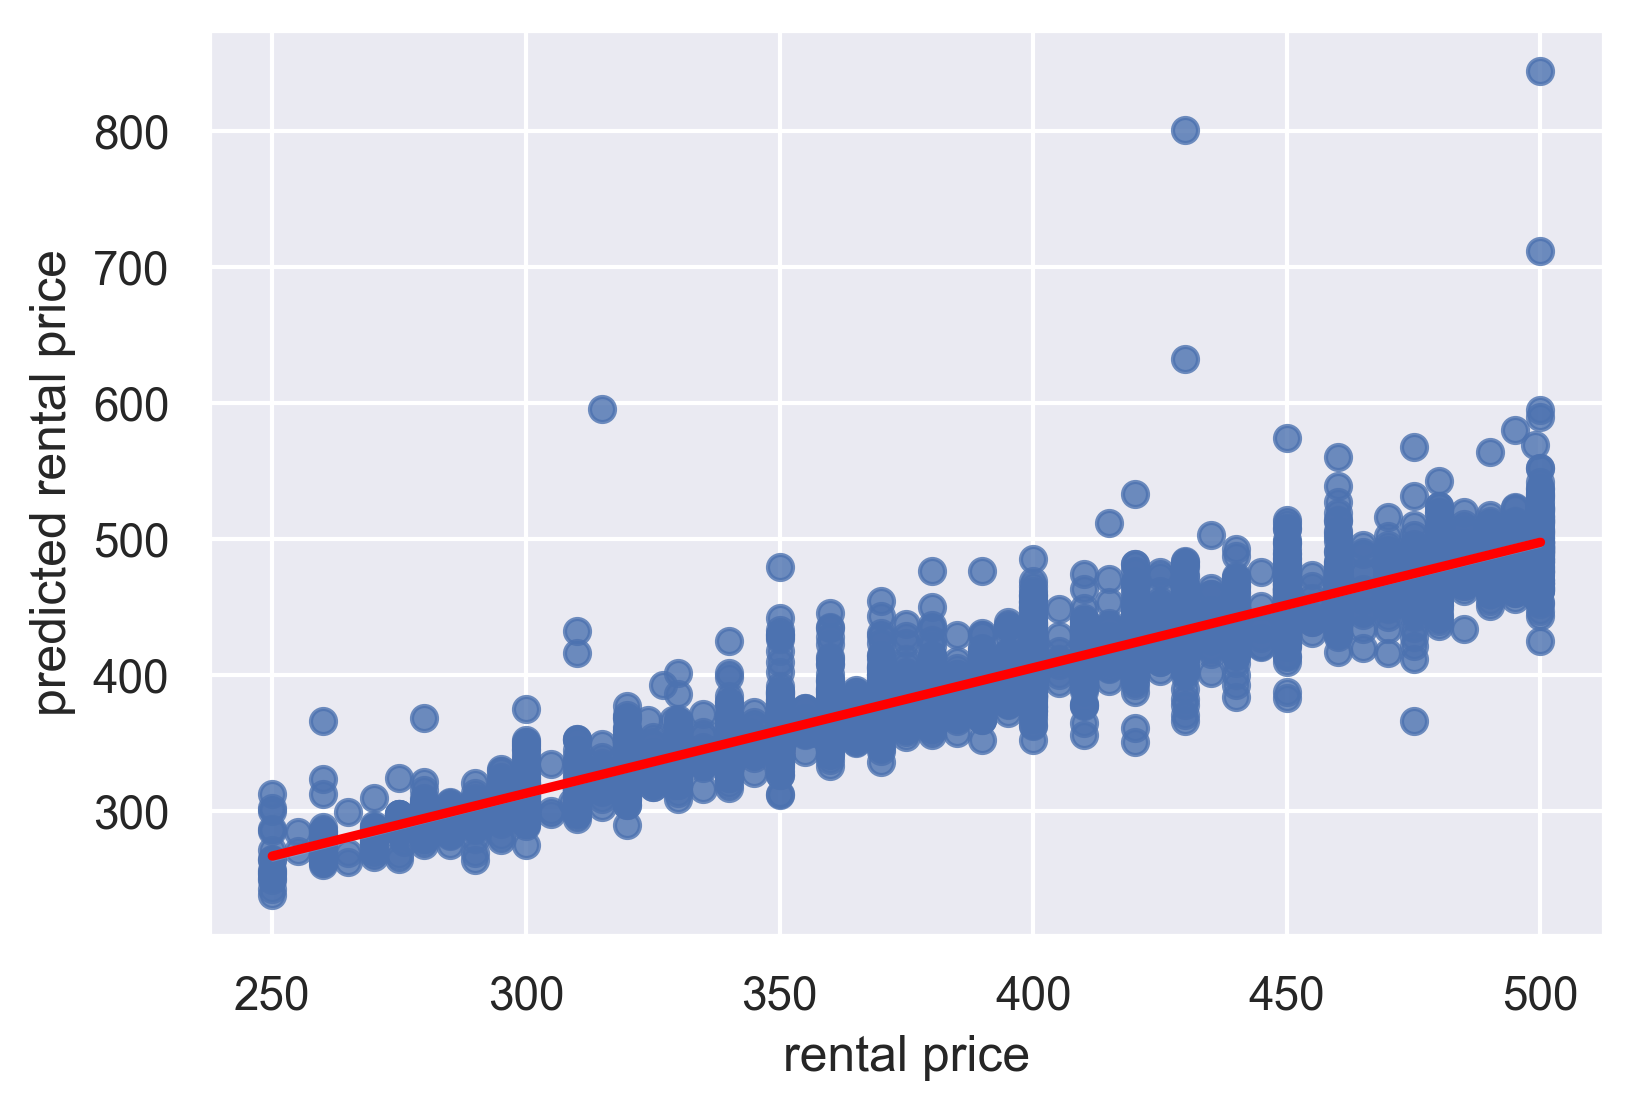

In [58]:
import seaborn as sns
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns_plot = sns.regplot(sample['gt'],sample['prediction'], line_kws={"color": "red"})

sns_plot.set_xlabel('rental price')
sns_plot.set_ylabel('predicted rental price')

